<a href="https://colab.research.google.com/github/iceman025/assignment3/blob/main/assignment_3_Resampling_Methods0804final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# load pachages
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(readxl)
install.packages("ISLR")
library (ISLR)
library(tidyverse)
install.packages("datarium")
install.packages("ISLR2")
library(ISLR2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



1. analysis of diamond data set





In [76]:
# data import and cleaning of diamond
data(diamonds)
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

In [77]:
# full regression model building of diamond data set
lm1= lm(log(price)~ log(carat) + cut+color+clarity, data=diamonds)
summary(lm1)



Call:
lm(formula = log(price) ~ log(carat) + cut + color + clarity, 
    data = diamonds)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01107 -0.08636 -0.00023  0.08341  1.94778 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  8.457030   0.001168 7242.225  < 2e-16 ***
log(carat)   1.883718   0.001129 1668.750  < 2e-16 ***
cut.L        0.120714   0.002354   51.284  < 2e-16 ***
cut.Q       -0.035115   0.002072  -16.950  < 2e-16 ***
cut.C        0.013479   0.001799    7.494 6.77e-14 ***
cut^4       -0.001562   0.001441   -1.084    0.278    
color.L     -0.439576   0.002027 -216.828  < 2e-16 ***
color.Q     -0.095623   0.001863  -51.335  < 2e-16 ***
color.C     -0.014783   0.001743   -8.481  < 2e-16 ***
color^4      0.011852   0.001601    7.403 1.35e-13 ***
color^5     -0.002201   0.001513   -1.455    0.146    
color^6      0.002391   0.001375    1.739    0.082 .  
clarity.L    0.916832   0.003578  256.274  < 2e-16 ***
clarity.Q   -0.24303

In [78]:
# data split of diamond
rows <- sample(nrow(diamonds))
diamonds <- diamonds[rows, ]
split <- round(nrow(diamonds) * .80)
train <- diamonds[1:split, ]
test <- diamonds[(split + 1):nrow(diamonds), ]


In [79]:
# regression model of train data of diamond
lm2 =lm(formula = log(price) ~ log(carat) + cut + color + clarity, 
     data=train)
     summary(lm2)
# print lm2
     lm2


Call:
lm(formula = log(price) ~ log(carat) + cut + color + clarity, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81093 -0.08643 -0.00041  0.08315  1.94591 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  8.458474   0.001302 6494.628  < 2e-16 ***
log(carat)   1.884257   0.001261 1493.754  < 2e-16 ***
cut.L        0.118598   0.002617   45.319  < 2e-16 ***
cut.Q       -0.032603   0.002304  -14.148  < 2e-16 ***
cut.C        0.013347   0.002005    6.657 2.83e-11 ***
cut^4       -0.001382   0.001610   -0.859    0.391    
color.L     -0.439988   0.002262 -194.546  < 2e-16 ***
color.Q     -0.094742   0.002079  -45.561  < 2e-16 ***
color.C     -0.014166   0.001948   -7.273 3.58e-13 ***
color^4      0.010873   0.001790    6.075 1.25e-09 ***
color^5     -0.002636   0.001693   -1.557    0.119    
color^6      0.001776   0.001537    1.156    0.248    
clarity.L    0.918509   0.003997  229.774  < 2e-16 ***
clarity.Q   -0.243180  


Call:
lm(formula = log(price) ~ log(carat) + cut + color + clarity, 
    data = train)

Coefficients:
(Intercept)   log(carat)        cut.L        cut.Q        cut.C        cut^4  
   8.458474     1.884257     0.118598    -0.032603     0.013347    -0.001382  
    color.L      color.Q      color.C      color^4      color^5      color^6  
  -0.439988    -0.094742    -0.014166     0.010873    -0.002636     0.001776  
  clarity.L    clarity.Q    clarity.C    clarity^4    clarity^5    clarity^6  
   0.918509    -0.243180     0.133445    -0.066509     0.027607    -0.002791  
  clarity^7  
   0.033578  


In [80]:
# price prediction of test data of diamond
modelEstimate2 = predict(lm2, subset= test,
                          interval="prediction",level = .95) 
modelEstimate2
exp(modelEstimate2)

Warning message in predict.lm(lm2, subset = test, interval = "prediction", level = 0.95):
“predictions on current data refer to _future_ responses
”


,fit,lwr,upr
1,9.611206,9.348934,9.873478
2,8.391273,8.128986,8.653560
3,6.339409,6.077138,6.601681
4,6.448362,6.186089,6.710636
5,6.874172,6.611839,7.136506
6,8.465259,8.203000,8.727517
7,7.170915,6.908646,7.433184
8,7.439764,7.177510,7.702019
9,6.394263,6.132004,6.656523
10,8.843162,8.580888,9.105437


,fit,lwr,upr
1,14931.1715,11486.5777,19408.7297
2,4408.4266,3391.3604,5730.5102
3,566.4616,435.7802,736.3316
4,631.6671,485.9421,821.0923
5,966.9747,743.8493,1257.0289
6,4746.9546,3651.8902,6170.3876
7,1301.0343,1000.8911,1691.1832
8,1702.3486,1309.6427,2212.8102
9,598.4022,460.3577,777.8413
10,6926.8634,5328.8356,9004.1128


In [81]:
# The Validation Set Approach of diamond
set.seed (1)
train <- sample (440 , 220)
# calculate the MSE of the observations in the validation set of diamond
model_summ <-summary(lm2)
mean(model_summ$residuals^2)

[1] 0.01789086

In [82]:
# Leave-One-Out Cross-Validation
 library (boot)
data(diamonds)

lm.fit <- lm(log(price) ~log(carat) + cut + color + clarity, 
     data=diamonds)
coef(lm.fit)

(Intercept)   log(carat)        cut.L        cut.Q        cut.C        cut^4 
 8.457029819  1.883717549  0.120714107 -0.035114713  0.013479121 -0.001561564 
     color.L      color.Q      color.C      color^4      color^5      color^6 
-0.439575925 -0.095623427 -0.014783149  0.011851662 -0.002201149  0.002391186 
   clarity.L    clarity.Q    clarity.C    clarity^4    clarity^5    clarity^6 
 0.916832286 -0.243038355  0.132399931 -0.066104311  0.027418230 -0.001818734 
   clarity^7 
 0.033531002

In [83]:
# k-Fold Cross Validation of diamonds
library (boot)
data(diamonds)
system.time({
  diamonds.fit <- glm(log(price) ~ log(carat) + cut + color + clarity, data = diamonds)
  cv.glm(diamonds, diamonds.fit, K = 10)
})

   user  system elapsed 
  1.335   0.048   1.383 

In [84]:
#Bootstrap on Regression: step 1
statistic <- function(diamonds, index) {
  x <- diamonds$X[index]
  y <- diamonds$Y[index]
  (var(y) - cov(x, y)) / (var(x) + var(y) - 2* cov(x, y))
}

In [85]:
#Bootstrap on Regression:step 2
install.packages("ISLR")
library (ISLR)

portfolio <- ISLR::Portfolio

# compute our statistic for all 100 observations
statistic(portfolio, 1:100)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.5758321

In [86]:
#Bootstrap on Regression: step 3
statistic(portfolio, sample(100, 100, replace = TRUE))

[1] 0.5671103

In [87]:
# #Bootstrap on Regression :step 4
library(boot)
set.seed(123)
boot(portfolio, statistic, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = portfolio, statistic = statistic, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.5758321 0.007544609  0.08952496

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = result, type = "basic")

Intervals : 
Level      Basic         
95%   ( 0.3918,  0.7449 )  
Calculations and Intervals on Original Scale

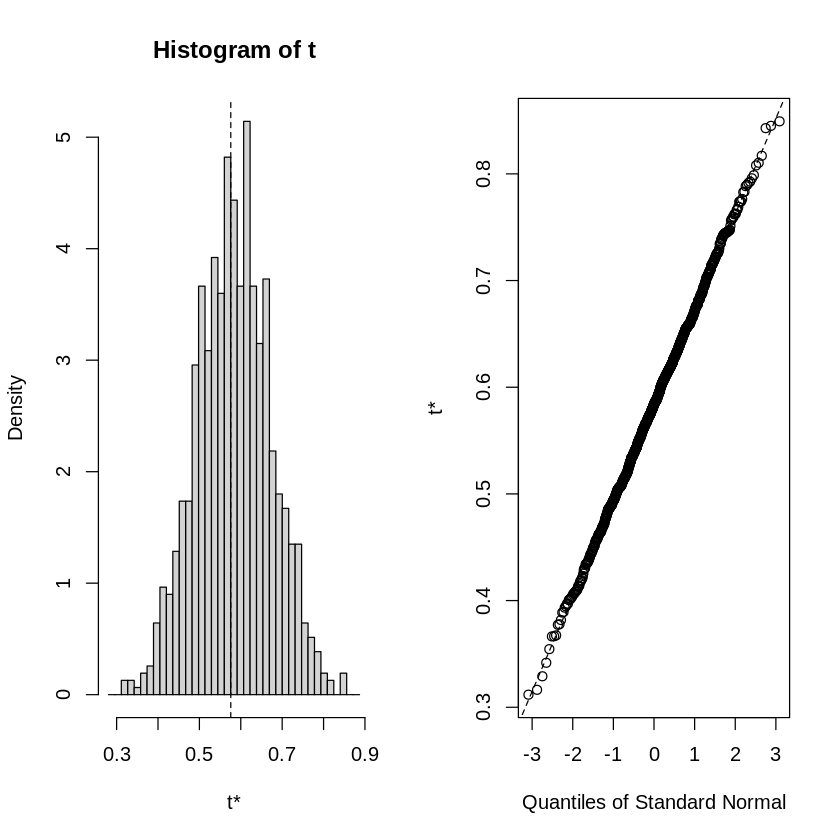

In [88]:
#Bootstrap on Regression:step 5-
#generate the bootstrap estimates we can also view the confidence intervals with boot.ci and plot our results
set.seed(123)
result <- boot(portfolio, statistic, R = 1000)
boot.ci(result, type = "basic")
plot(result)

2. analysis of bank data set


In [89]:
#  bank data import
df_bank<-read_delim("https://raw.githubusercontent.com/iceman025/bank-assignment-02/main/bank-additional-full.csv",delim = ";")
str(df_bank)
head(df_bank)
sum(is.na(df_bank))
glimpse(df_bank)

Rows: 41188 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (11): job, marital, education, default, housing, loan, contact, month, d...
dbl (10): age, duration, campaign, pdays, previous, emp.var.rate, cons.price...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spec_tbl_df [41,188 × 21] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age           : num [1:41188] 56 57 37 40 56 45 59 41 24 25 ...
 $ job           : chr [1:41188] "housemaid" "services" "services" "admin." ...
 $ marital       : chr [1:41188] "married" "married" "married" "married" ...
 $ education     : chr [1:41188] "basic.4y" "high.school" "high.school" "basic.6y" ...
 $ default       : chr [1:41188] "no" "unknown" "no" "no" ...
 $ housing       : chr [1:41188] "no" "no" "yes" "no" ...
 $ loan          : chr [1:41188] "no" "no" "no" "no" ...
 $ contact       : chr [1:41188] "telephone" "telephone" "telephone" "telephone" ...
 $ month         : chr [1:41188] "may" "may" "may" "may" ...
 $ day_of_week   : chr [1:41188] "mon" "mon" "mon" "mon" ...
 $ duration      : num [1:41188] 261 149 226 151 307 198 139 217 380 50 ...
 $ campaign      : num [1:41188] 1 1 1 1 1 1 1 1 1 1 ...
 $ pdays         : num [1:41188] 999 999 999 999 999 999 999 999 999 999 ...
 $ previous      : num [1:411

age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


[1] 0

Rows: 41,188
Columns: 21
$ age            <dbl> 56, 57, 37, 40, 56, 45, 59, 41, 24, 25, 41, 25, 29, 57,…
$ job            <chr> "housemaid", "services", "services", "admin.", "service…
$ marital        <chr> "married", "married", "married", "married", "married", …
$ education      <chr> "basic.4y", "high.school", "high.school", "basic.6y", "…
$ default        <chr> "no", "unknown", "no", "no", "no", "unknown", "no", "un…
$ housing        <chr> "no", "no", "yes", "no", "no", "no", "no", "no", "yes",…
$ loan           <chr> "no", "no", "no", "no", "yes", "no", "no", "no", "no", …
$ contact        <chr> "telephone", "telephone", "telephone", "telephone", "te…
$ month          <chr> "may", "may", "may", "may", "may", "may", "may", "may",…
$ day_of_week    <chr> "mon", "mon", "mon", "mon", "mon", "mon", "mon", "mon",…
$ duration       <dbl> 261, 149, 226, 151, 307, 198, 139, 217, 380, 50, 55, 22…
$ campaign       <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ pdays        

In [90]:
# model building 
model_full <- glm(formula =as.factor(y)~duration + month + poutcome + emp.var.rate + job + cons.price.idx + 
    contact + euribor3m + day_of_week + campaign + pdays + education + 
    cons.conf.idx + default , 
 family = "binomial", data = df_bank)
     summary(model_full)


Call:
glm(formula = as.factor(y) ~ duration + month + poutcome + emp.var.rate + 
    job + cons.price.idx + contact + euribor3m + day_of_week + 
    campaign + pdays + education + cons.conf.idx + default, family = "binomial", 
    data = df_bank)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.0080  -0.2976  -0.1855  -0.1346   3.3263  

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.713e+02  1.032e+01 -16.597  < 2e-16 ***
duration                      4.707e-03  7.457e-05  63.125  < 2e-16 ***
monthaug                      7.622e-01  1.075e-01   7.092 1.32e-12 ***
monthdec                      1.809e-01  1.958e-01   0.924 0.355648    
monthjul                      1.341e-01  9.579e-02   1.400 0.161423    
monthjun                     -4.037e-01  1.064e-01  -3.793 0.000149 ***
monthmar                      1.870e+00  1.169e-01  15.994  < 2e-16 ***
monthmay                     -5.017e-01  7.610e

In [91]:
# Leave-One-Out Cross-Validation
 library (boot)
data(df_bank)

lm.fit2 <- glm(formula =as.factor(y)~duration + month + poutcome + emp.var.rate + job + cons.price.idx + 
    contact + euribor3m + day_of_week + campaign + pdays + education + 
    cons.conf.idx + default , 
 family = "binomial", data = df_bank)
coef(lm.fit2)

Warning message in data(df_bank):
“data set ‘df_bank’ not found”


(Intercept)                     duration 
               -1.713299e+02                 4.707335e-03 
                    monthaug                     monthdec 
                7.621668e-01                 1.808653e-01 
                    monthjul                     monthjun 
                1.341370e-01                -4.036632e-01 
                    monthmar                     monthmay 
                1.870181e+00                -5.017057e-01 
                    monthnov                     monthoct 
               -5.214135e-01                 3.543449e-02 
                    monthsep          poutcomenonexistent 
                1.532390e-01                 4.966073e-01 
             poutcomesuccess                 emp.var.rate 
                1.021730e+00                -1.606873e+00 
              jobblue-collar              jobentrepreneur 
               -2.353362e-01                -1.822498e-01 
                jobhousemaid                jobmanagement 
               -2.965722e-02                -6.864573e-02 
                  jobretired             jobself-employed 
                2.783738e-01                -1.607440e-01 
                 jobservices                   jobstudent 
               -1.428383e-01                 2.311813e-01 
               jobtechnician                jobunemployed 
               -1.590896e-02                 1.736894e-02 
                  jobunknown               cons.price.idx 
               -7.189527e-02                 1.779699e+00 
            contacttelephone                    euribor3m 
               -6.067452e-01                 5.011796e-01 
              day_of_weekmon               day_of_weekthu 
               -1.208210e-01                 5.634705e-02 
              day_of_weektue               day_of_weekwed 
                8.948309e-02                 1.690153e-01 
                    campaign                        pdays 
               -4.026451e-02                -8.541765e-04 
           educationbasic.6y            educationbasic.9y 
                1.219842e-01                 3.528640e-03 
        educationhigh.school          educationilliterate 
                5.681897e-02                 1.069923e+00 
educationprofessional.course   educationuniversity.degree 
                1.175341e-01                 2.034363e-01 
            educationunknown                cons.conf.idx 
                1.565260e-01                 1.108333e-02 
              defaultunknown                   defaultyes 
               -3.017932e-01                -7.317008e+00

In [92]:
# k-Fold Cross Validation of bank
library (boot)
data(df_bank)
system.time({
  bank.fit <- glm(formula =as.factor(y)~duration + month + poutcome + emp.var.rate + job + cons.price.idx + 
    contact + euribor3m + day_of_week + campaign + pdays + education + 
    cons.conf.idx + default , 
 family = "binomial", data = df_bank)
  cv.glm(df_bank, bank.fit, K = 10)
})

Warning message in data(df_bank):
“data set ‘df_bank’ not found”


   user  system elapsed 
 11.580   0.068  11.676 

In [93]:
#Bootstrap on Regression: step 1
statistic2 <- function(df_bank, index) {
  x <- df_bank$X[index]
  y <- df_bank$Y[index]
  (var(y) - cov(x, y)) / (var(x) + var(y) - 2* cov(x, y))
}
#Bootstrap on Regression:step 2
install.packages("ISLR")
library (ISLR)
portfolio2 <- ISLR::Portfolio
# compute our statistic for all 100 observations
statistic(portfolio2, 1:100)
#Bootstrap on Regression: step 3
statistic(portfolio2, sample(100, 100, replace = TRUE))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 0.5758321

[1] 0.5109278

In [94]:
# #Bootstrap on Regression :step 4
library(boot)
set.seed(123)
boot(portfolio2, statistic, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = portfolio2, statistic = statistic, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.5758321 0.007544609  0.08952496

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = result2, type = "basic")

Intervals : 
Level      Basic         
95%   ( 0.3918,  0.7449 )  
Calculations and Intervals on Original Scale

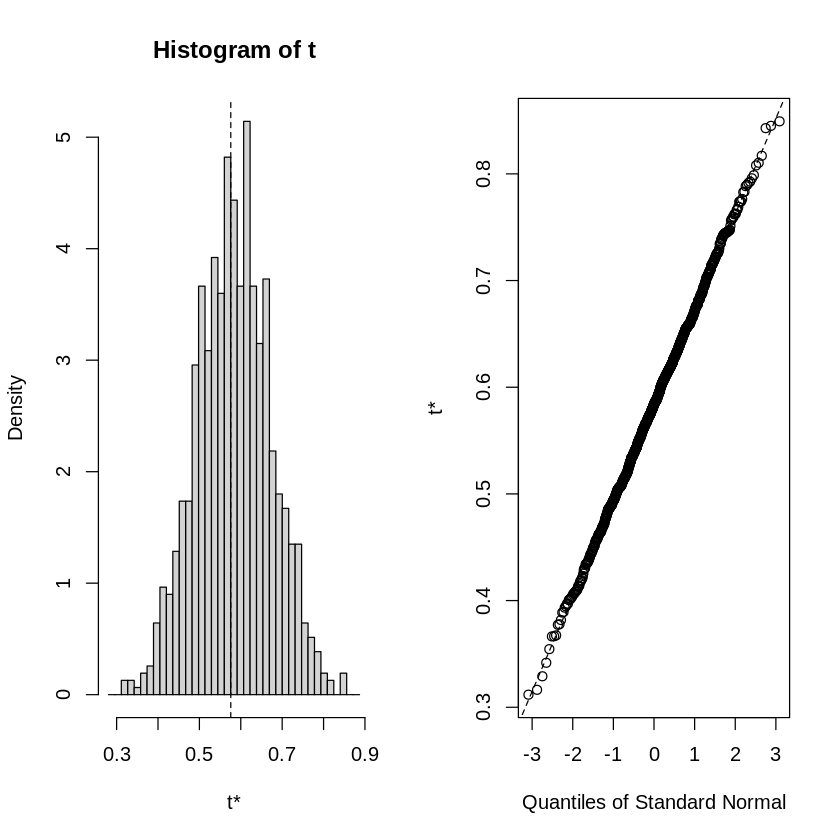

In [95]:
#Bootstrap on Regression:step 5-
#generate the bootstrap estimates we can also view the confidence intervals with boot.ci and plot our results
set.seed(123)
result2 <- boot(portfolio2, statistic2, R = 1000)
boot.ci(result2, type = "basic")
plot(result2)